In [3]:
# pip install tensorflow

     |████████████████████████████████| 320.4 MB 16 kB/s s eta 0:00:01
     |████████████████████████████████| 10.6 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 380 kB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 112 kB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 590 kB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 67.9 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 68.7 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=d0dcb83078d4ec5883417a3507983352b43ac65cd71da455b61f11ffd2db2400
  Stored in direc

In [1]:
pip install matplotlib

  Using cached matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import layers

In [4]:
pwd

'/root/Artist-Classification'

In [3]:
train_path = 'images/split/train'
valid_path = 'images/split/test'
test_path = 'images/split/val'

In [4]:
os.path.exists(train_path)

True

In [5]:
ls images/split/train

Claude_Monet/   Paul_Cézanne/  francisco_goya/  van_gogh/
Henri_Matisse/  andré_derain/  michelangelo/    édouard_manet/


In [6]:
classlist = ['Claude_Monet', 'Paul_Cézanne', 'francisco_goya', 'van_gogh', 'Henri_Matisse', 'andré_derain', 'michelangelo', 'édouard_manet']
batch_size = 8

In [7]:
AugmentGenerator = ImageDataGenerator(rescale = 1./255.,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

aug_batches = AugmentGenerator.flow_from_directory(train_path,
                                                   target_size=(224, 224),
                                                   classes=classlist,
                                                   batch_size=batch_size)

Found 2020 images belonging to 8 classes.


In [43]:
train_batches =  ImageDataGenerator(rescale = 1./255.).flow_from_directory(train_path,
                                                                           target_size=(224, 224),
                                                                           classes=classlist,
                                                                           batch_size=batch_size)

valid_batches = ImageDataGenerator(rescale = 1./255.).flow_from_directory(valid_path,
                                                                          target_size=(224, 224),
                                                                          classes=classlist,
                                                                          batch_size=batch_size)

test_batches = ImageDataGenerator(rescale = 1./255.).flow_from_directory(test_path,
                                                                         target_size=(224, 224),
                                                                         classes=classlist,
                                                                         batch_size=batch_size)

Found 2020 images belonging to 8 classes.
Found 585 images belonging to 8 classes.
Found 284 images belonging to 8 classes.


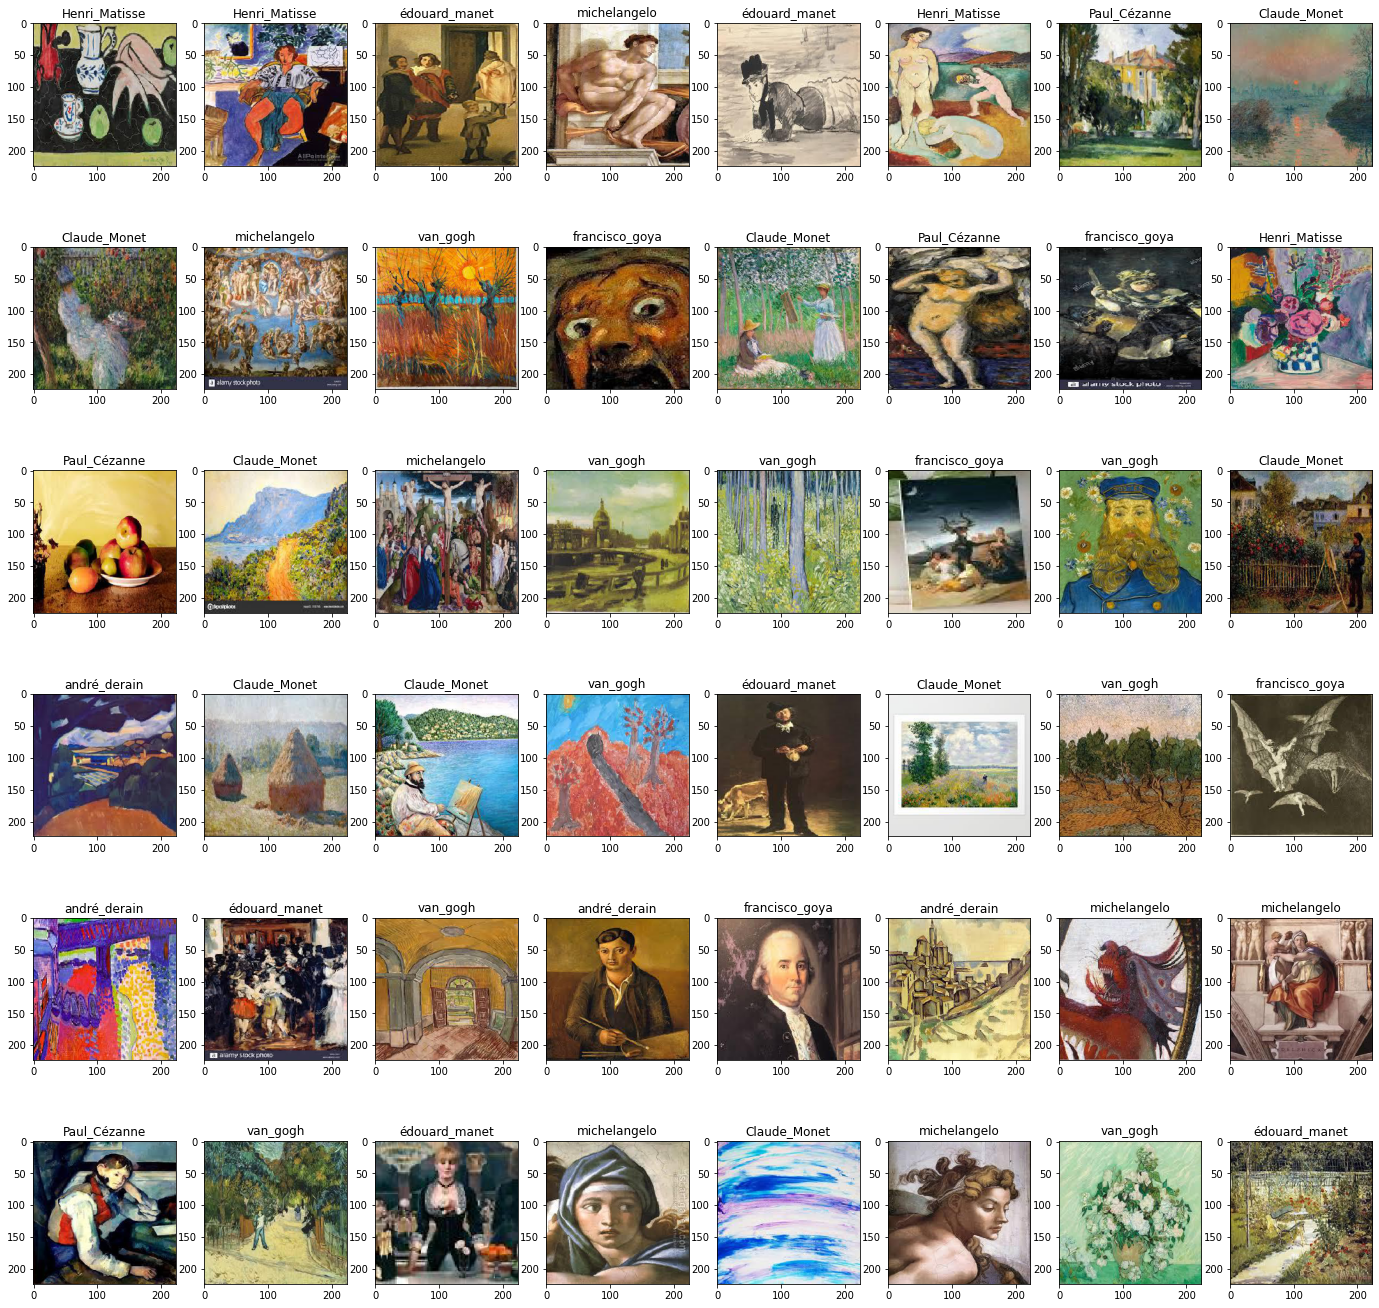

In [9]:
def image_plot(rows, batch, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        
        for j, pic in enumerate(images):
            if rows > 1:
                axs[i,j].imshow(pic)
                axs[i,j].set_title(classlist[list(labels[j]).index(1)])
            
            else:
                axs[j].imshow(pic)
                axs[j].set_title(classlist[list(labels[j]).index(1)])

image_plot(rows=6, batch=train_batches)

In [59]:
from tensorflow.keras.applications.vgg19 import VGG19

In [60]:
vgg19_model = VGG19(input_shape = (224, 224, 3),
                    include_top = False,
                    weights = 'imagenet')

In [61]:
for layer in vgg19_model.layers[:]:
    layer.trainable = False

In [62]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
num_classes = len(classlist)

In [33]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model1 = tf.keras.models.Model(vgg19_model.input, x)

RMS =  tf.keras.optimizers.RMSprop(lr=0.0001)

model1.compile(optimizer = RMS,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [34]:
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [30]:
# opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [35]:
model1.fit(train_batches, validation_data=valid_batches, epochs=30, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/30
253/253 [==============================] - 21s 83ms/step - loss: 2.0042 - accuracy: 0.2926 - val_loss: 1.6867 - val_accuracy: 0.3590
Epoch 2/30
253/253 [==============================] - 21s 81ms/step - loss: 1.5086 - accuracy: 0.4545 - val_loss: 1.4856 - val_accuracy: 0.4291
Epoch 3/30
253/253 [==============================] - 21s 82ms/step - loss: 1.2744 - accuracy: 0.5426 - val_loss: 1.5410 - val_accuracy: 0.4205
Epoch 4/30
253/253 [==============================] - 21s 83ms/step - loss: 1.1282 - accuracy: 0.5980 - val_loss: 1.2422 - val_accuracy: 0.5863
Epoch 5/30
253/253 [==============================] - 21s 84ms/step - loss: 0.9956 - accuracy: 0.6579 - val_loss: 1.3703 - val_accuracy: 0.5402
Epoch 6/30
253/253 [==============================] - 21s 83ms/step - loss: 0.8320 - accuracy: 0.7188 - val_loss: 1.2131 - val_accuracy: 0.5812
Epoch 7/30
253/253 [==============================] - 21s 82ms/step - loss: 0.7558 - accuracy

In [36]:
model1.save('Art5_Classifier_VGG19_model.h5')

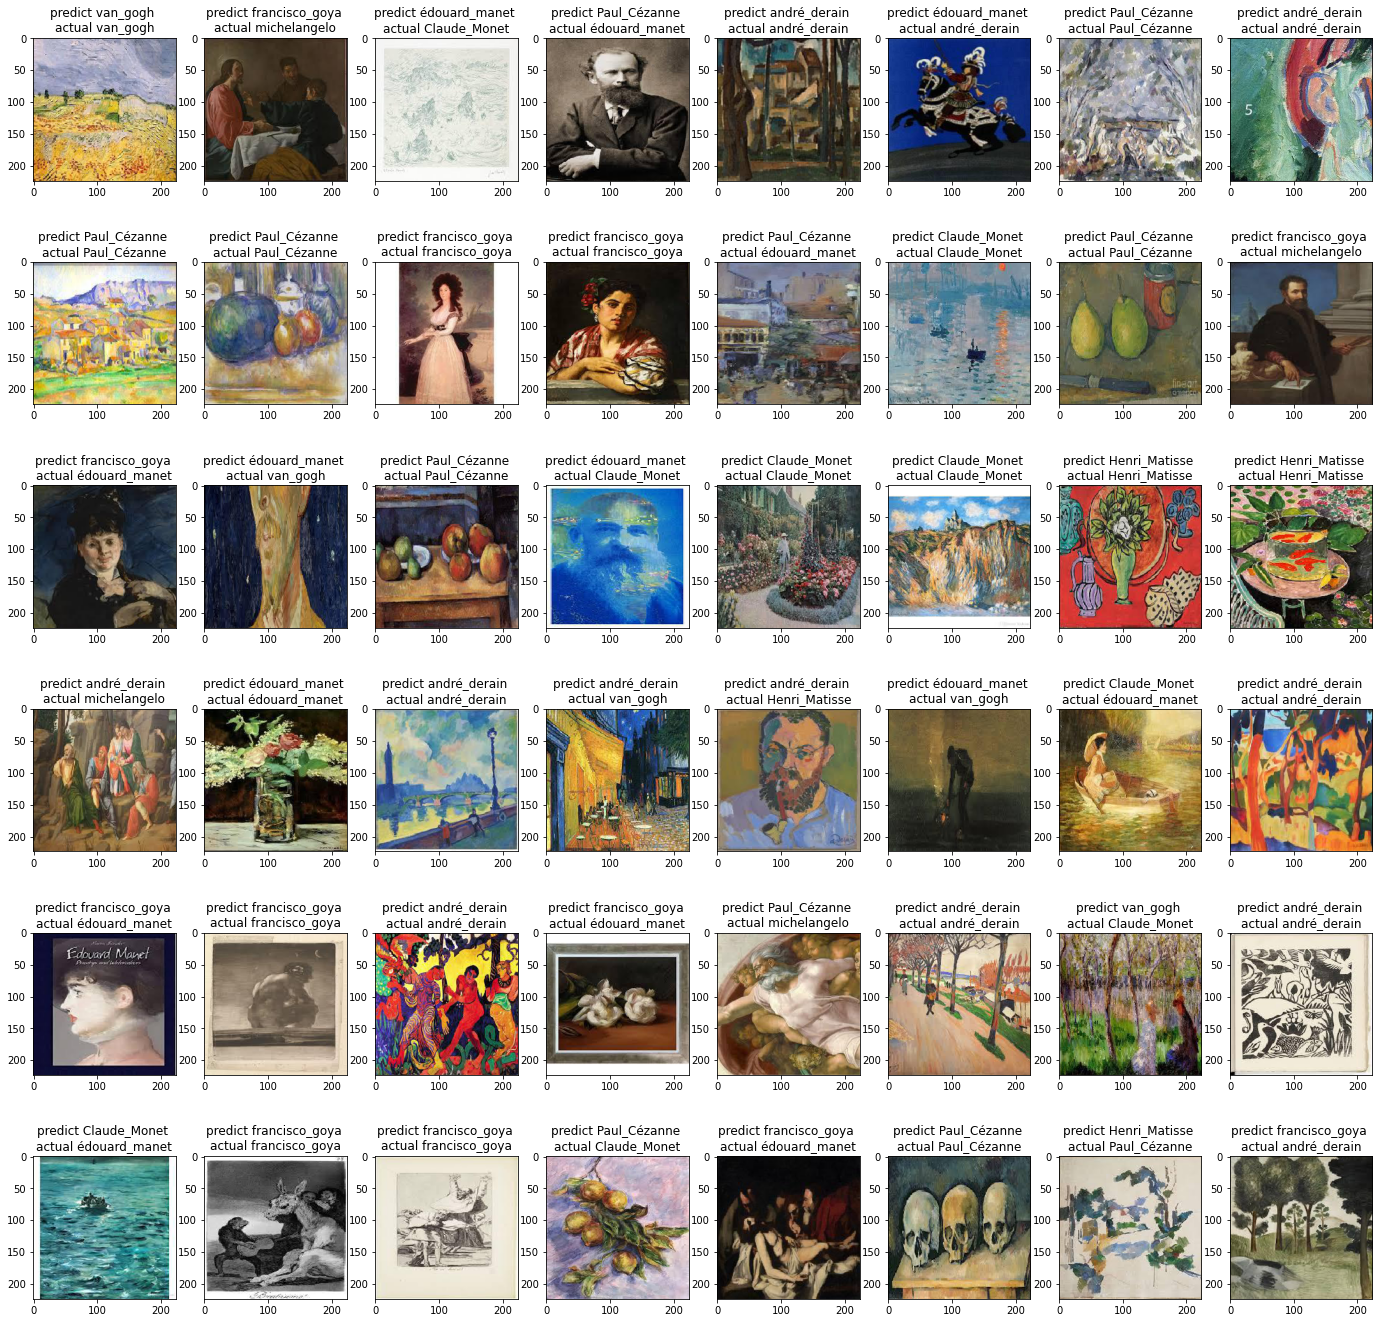

In [39]:
def image_plot_predict(rows, batch, model, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        predictions = model.predict(images)
        
        for j, pic in enumerate(images):
            
            title = 'predict' + ' ' + \
            classlist[list(predictions[j]).index(predictions[j].max())] + ' ' + \
            '\n' + \
            'actual' + ' ' + \
            classlist[list(labels[j]).index(1)]
            
            if rows > 1:
                axs[i,j].imshow(pic)
                axs[i,j].set_title(title)
            
            else:
                axs[j].imshow(pic)
                axs[j].set_title(title)

image_plot_predict(rows=6, batch=test_batches, model=model1)

In [40]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model2 = tf.keras.models.Model(vgg19_model.input, x)

RMS =  tf.keras.optimizers.RMSprop(lr=0.0001)

model2.compile(optimizer = RMS,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [41]:
model2.fit(aug_batches, validation_data=valid_batches, epochs=30, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/30
253/253 [==============================] - 32s 127ms/step - loss: 2.1030 - accuracy: 0.2371 - val_loss: 1.6396 - val_accuracy: 0.3915
Epoch 2/30
253/253 [==============================] - 32s 126ms/step - loss: 1.7227 - accuracy: 0.3480 - val_loss: 1.5310 - val_accuracy: 0.4444
Epoch 3/30
253/253 [==============================] - 31s 124ms/step - loss: 1.6492 - accuracy: 0.3946 - val_loss: 1.4674 - val_accuracy: 0.4564
Epoch 4/30
253/253 [==============================] - 32s 126ms/step - loss: 1.5882 - accuracy: 0.4099 - val_loss: 1.4355 - val_accuracy: 0.4650
Epoch 5/30
253/253 [==============================] - 32s 126ms/step - loss: 1.5471 - accuracy: 0.4351 - val_loss: 1.4481 - val_accuracy: 0.4752
Epoch 6/30
253/253 [==============================] - 32s 126ms/step - loss: 1.4943 - accuracy: 0.4604 - val_loss: 1.3590 - val_accuracy: 0.5026
Epoch 7/30
253/253 [==============================] - 32s 126ms/step - loss: 1.4847 - a

In [42]:
train =  ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=classlist, batch_size=batch_size)
valid = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=classlist, batch_size=batch_size)
test = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=classlist, batch_size=batch_size)

Found 2020 images belonging to 8 classes.
Found 585 images belonging to 8 classes.
Found 284 images belonging to 8 classes.


In [43]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model3 = tf.keras.models.Model(vgg19_model.input, x)

RMS =  tf.keras.optimizers.RMSprop(lr=0.0001)

model3.compile(optimizer = RMS,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [46]:
model3.fit(train, validation_data=valid, epochs=10, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/10
253/253 [==============================] - 25s 97ms/step - loss: 12.2058 - accuracy: 0.4109 - val_loss: 5.3218 - val_accuracy: 0.4923
Epoch 2/10
253/253 [==============================] - 24s 95ms/step - loss: 1.1471 - accuracy: 0.8500 - val_loss: 3.8323 - val_accuracy: 0.5231
Epoch 3/10
253/253 [==============================] - 24s 94ms/step - loss: 0.2959 - accuracy: 0.9525 - val_loss: 3.1485 - val_accuracy: 0.6051
Epoch 4/10
253/253 [==============================] - 24s 94ms/step - loss: 0.1549 - accuracy: 0.9792 - val_loss: 3.2393 - val_accuracy: 0.6000
Epoch 5/10
253/253 [==============================] - 24s 95ms/step - loss: 0.1069 - accuracy: 0.9906 - val_loss: 3.3882 - val_accuracy: 0.5880
Epoch 6/10
253/253 [==============================] - 24s 95ms/step - loss: 0.1280 - accuracy: 0.9911 - val_loss: 3.2560 - val_accuracy: 0.6120
Epoch 7/10
253/253 [==============================] - 24s 95ms/step - loss: 0.0851 - accurac

In [50]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(6144, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.15)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(6144, activation='selu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.15)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model4 = tf.keras.models.Model(vgg19_model.input, x)

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

model4.compile(optimizer = sgd,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [51]:
model4.fit(train, validation_data=valid, epochs=10, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/10
253/253 [==============================] - 25s 99ms/step - loss: 12.3202 - accuracy: 0.4000 - val_loss: 3.2620 - val_accuracy: 0.5744
Epoch 2/10
253/253 [==============================] - 24s 96ms/step - loss: 0.9973 - accuracy: 0.8678 - val_loss: 4.4159 - val_accuracy: 0.5282
Epoch 3/10
253/253 [==============================] - 25s 98ms/step - loss: 0.3365 - accuracy: 0.9525 - val_loss: 3.6501 - val_accuracy: 0.5658
Epoch 4/10
253/253 [==============================] - 25s 99ms/step - loss: 0.2055 - accuracy: 0.9797 - val_loss: 3.0843 - val_accuracy: 0.5915
Epoch 5/10
253/253 [==============================] - 25s 99ms/step - loss: 0.1531 - accuracy: 0.9856 - val_loss: 2.9170 - val_accuracy: 0.6325
Epoch 6/10
253/253 [==============================] - 24s 96ms/step - loss: 0.0971 - accuracy: 0.9936 - val_loss: 3.0664 - val_accuracy: 0.6120
Epoch 7/10
253/253 [==============================] - 24s 95ms/step - loss: 0.1074 - accurac

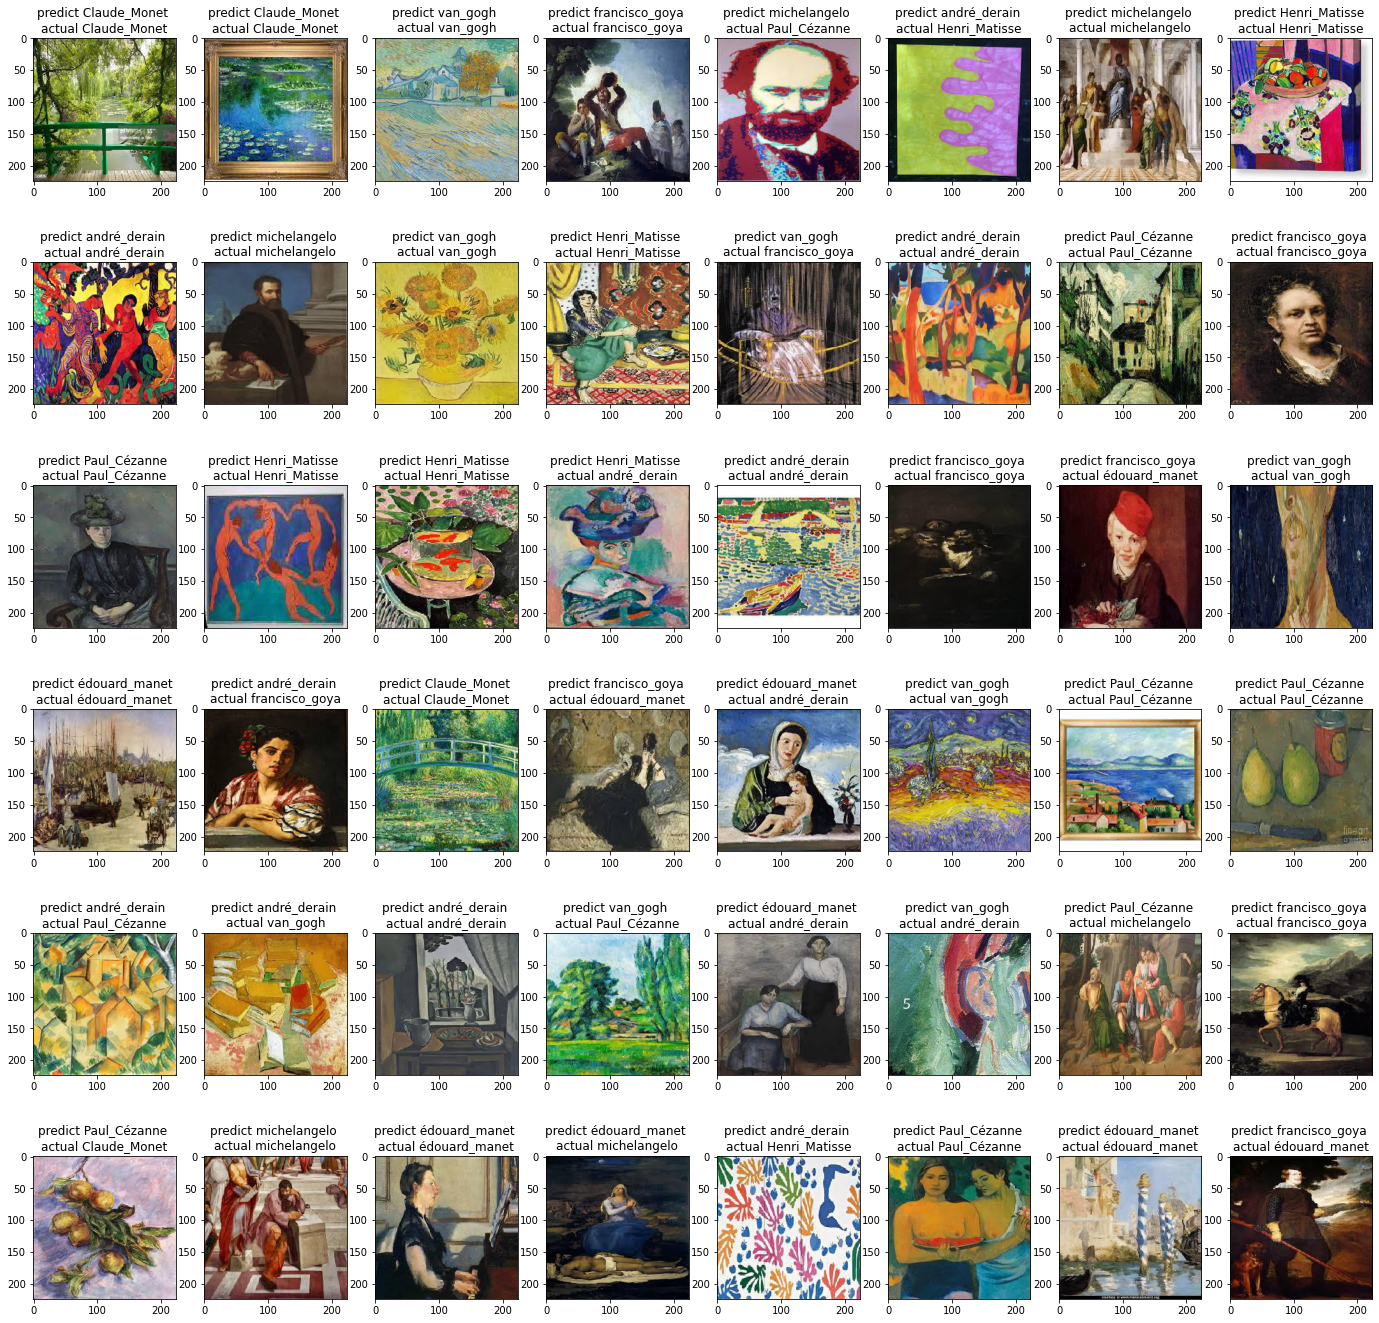

In [53]:
def image_plot_predict(rows, batch, model, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        predictions = model.predict(images)
        
        for j, pic in enumerate(images):
            
            title = 'predict' + ' ' + \
            classlist[list(predictions[j]).index(predictions[j].max())] + ' ' + \
            '\n' + \
            'actual' + ' ' + \
            classlist[list(labels[j]).index(1)]
            
            if rows > 1:
                axs[i,j].imshow(pic/255)
                axs[i,j].set_title(title)
            
            else:
                axs[j].imshow(pic/255)
                axs[j].set_title(title)

image_plot_predict(rows=6, batch=test, model=model4)

In [56]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16_model = VGG16(input_shape = (224, 224, 3),
                    include_top = False,
                    weights = 'imagenet')

for layer in vgg16_model.layers[:]:
    layer.trainable = False

In [68]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model5 = tf.keras.models.Model(vgg19_model.input, x)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model5.compile(optimizer = sgd,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
model5.fit(train_batches, validation_data=valid_batches, epochs=30, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/30
253/253 [==============================] - 21s 83ms/step - loss: 0.9885 - accuracy: 0.6421 - val_loss: 1.2952 - val_accuracy: 0.5726
Epoch 2/30
253/253 [==============================] - 21s 84ms/step - loss: 0.9767 - accuracy: 0.6426 - val_loss: 1.3088 - val_accuracy: 0.5368
Epoch 3/30
253/253 [==============================] - 22s 85ms/step - loss: 0.9204 - accuracy: 0.6653 - val_loss: 1.4986 - val_accuracy: 0.5179
Epoch 20/30
253/253 [==============================] - 21s 84ms/step - loss: 0.9386 - accuracy: 0.6594 - val_loss: 1.4558 - val_accuracy: 0.5265
Epoch 21/30
253/253 [==============================] - 21s 83ms/step - loss: 0.9179 - accuracy: 0.6525 - val_loss: 1.4228 - val_accuracy: 0.5368
Epoch 22/30
253/253 [==============================] - 21s 83ms/step - loss: 0.8941 - accuracy: 0.6792 - val_loss: 1.4233 - val_accuracy: 0.5162
Epoch 23/30
253/253 [==============================] - 21s 84ms/step - loss: 0.9424 - accu

In [65]:
model5.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [71]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg16_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model6 = tf.keras.models.Model(vgg16_model.input, x)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model6.compile(optimizer = sgd,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
model6.fit(train_batches, validation_data=valid_batches, epochs=30, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/30
253/253 [==============================] - 21s 84ms/step - loss: 0.8441 - accuracy: 0.6975 - val_loss: 1.3613 - val_accuracy: 0.5607
Epoch 2/30
253/253 [==============================] - 21s 83ms/step - loss: 0.7896 - accuracy: 0.7183 - val_loss: 1.2705 - val_accuracy: 0.5932
Epoch 3/30
253/253 [==============================] - 21s 84ms/step - loss: 0.7950 - accuracy: 0.7223 - val_loss: 1.4726 - val_accuracy: 0.4940
Epoch 4/30
253/253 [==============================] - 21s 84ms/step - loss: 0.8428 - accuracy: 0.6980 - val_loss: 1.6355 - val_accuracy: 0.5060
Epoch 5/30
253/253 [==============================] - 22s 86ms/step - loss: 0.8798 - accuracy: 0.6807 - val_loss: 1.3492 - val_accuracy: 0.5726
Epoch 6/30
253/253 [==============================] - 21s 83ms/step - loss: 0.8620 - accuracy: 0.6817 - val_loss: 1.3055 - val_accuracy: 0.5744
Epoch 7/30
253/253 [==============================] - 21s 83ms/step - loss: 0.9129 - accuracy